# Industrial Copper Modeling

## Packages

In [1]:
pip install joblib pandas matplotlib seaborn numpy scikit-learn

Note: you may need to restart the kernel to use updated packages.


## Dependencies

In [68]:
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix

## Load Data

In [3]:
raw_data = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQlzTh9zpulyeA4rKW-9HhXQulTVuknudEUGeSZxHaFBgsgq_xvaZoGu2lDP6P3wQ/pub?output=csv")

/var/folders/7r/6xbgz3t92ks24g5fq035xvt40000gn/T/ipykernel_6801/933608367.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQlzTh9zpulyeA4rKW-9HhXQulTVuknudEUGeSZxHaFBgsgq_xvaZoGu2lDP6P3wQ/pub?output=csv")


## Understanding the Data

In [4]:
raw_data.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [5]:
raw_data.tail()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.0
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.0
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.0
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.0
181672,AD0CA853-AE3C-4B2F-9FBB-8B0B965F84BC,20200702.0,406.6865384,30200854.0,25.0,Won,W,41.0,0.71,1240.0,0000000000000000000000000000000001005439,164141591,20200701.0,607.0


In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


The columns and their data types are as follows:

**id (object)**: This column appears to be a unique identifier.

**item_date (float64)**: This column may represent dates, but it's currently stored as float64. 

**quantity tons (object)**: This column is expected to represent quantities in tons, but it's stored as an object. 

**customer (float64):** This column likely represents customer IDs, stored as float64. 
*It could be converted to a categorical or integer data type depending on its nature.*

**country (float64):** This column likely represents country codes or IDs, stored as float64. 
*It could be converted to a categorical or integer data type depending on its nature.*

**status (object):** This column seems to represent the status of the items. It's stored as an object, which is appropriate for categorical data.

**item type (object):** This column appears to represent the type of items. It's stored as an object, suitable for categorical data.

**application (float64):** This column may represent application IDs or codes, stored as float64. 
*It could be converted to a categorical or integer data type depending on its nature.*

**thickness (float64):** This column represents thickness measurements, stored as float64.

**width (float64):** This column represents width measurements, stored as float64.

**material_ref (object):** This column is stored as an object, which may contain references or codes for materials.

**product_ref (int64):** This column contains integer values.

**delivery date (float64):** This column may represent delivery dates, but it's stored as float64. 

**selling_price (float64):** This column represents selling prices, stored as float64.

In [7]:
for column in raw_data.columns:
    unique_values = raw_data[column].unique()
    num_unique_values = len(unique_values)
    print(f"Number of unique values in '{column}' : {num_unique_values}")

Number of unique values in 'id' : 181672
Number of unique values in 'item_date' : 253
Number of unique values in 'quantity tons' : 181673
Number of unique values in 'customer' : 1170
Number of unique values in 'country' : 18
Number of unique values in 'status' : 10
Number of unique values in 'item type' : 7
Number of unique values in 'application' : 31
Number of unique values in 'thickness' : 595
Number of unique values in 'width' : 1386
Number of unique values in 'material_ref' : 16564
Number of unique values in 'product_ref' : 33
Number of unique values in 'delivery date' : 29
Number of unique values in 'selling_price' : 9796


**id** : Drop

**item_date** : Convert it to date/type or DROP

**quantity tons** : Convert it to Numeric

**customer** : Treat as Catagorical

**country** : Treat as Catagorical

**status** : Catagorical

**item type** : Catagorical

**application** : Treat as Catagorical

**thickness** : Numerical

**width** : Numerical

**material_ref** : DROP

**product_ref** : Treat as Catagorical

**delivery date** : Convert it to date/type or DROP

**selling_price** : DEPEDENT VARIABLE


## Pre-Processing the data

In [8]:
data = raw_data.copy()

In [9]:
# Drop Column
data.drop(['id', 'material_ref', 'delivery date', 'item_date'], axis=1, inplace=True)

In [10]:
# Convert Columns to Appropriate Types
data['quantity tons'] = pd.to_numeric(data['quantity tons'], errors='coerce')

In [11]:
# Converting to catagorical
categorical_columns = ['customer', 'country', 'status', 'item type', 'application', 'product_ref']
data[categorical_columns] = data[categorical_columns].astype('category')

In [12]:
data.shape

(181673, 10)

In [13]:
data['status'].unique()

['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM', 'Wonderful', 'Revised', 'Offered', 'Offerable', NaN]
Categories (9, object): ['Draft', 'Lost', 'Not lost for AM', 'Offerable', ..., 'Revised', 'To be approved', 'Won', 'Wonderful']

Data should not be less than 172589.35 after cleaning.

In [14]:
data.isnull().sum()

quantity tons     1
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
product_ref       0
selling_price     1
dtype: int64

In [15]:
data_with_no_mv = data.dropna()

In [16]:
data_with_no_mv.isnull().sum()

quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
selling_price    0
dtype: int64

In [17]:
pd.set_option('display.float_format', '{:.6f}'.format)
data_with_no_mv.describe()

,quantity tons,thickness,width,selling_price
count,181639.000000,181639.000000,181639.000000,181639.000000
mean,5875.974225,2.564145,1295.265103,1918.322724
std,2349294.621285,6.572500,261.641088,331825.780786
min,-2000.000000,0.180000,1.000000,-1160.000000
25%,10.968692,0.700000,1180.000000,669.000000
50%,30.363953,1.500000,1250.000000,812.000000
75%,67.161869,3.000000,1500.000000,953.000000
max,1000000000.000000,2500.000000,2990.000000,100001015.000000


## Handling Outliers

In [18]:
data_outliers = data_with_no_mv.copy()

In [19]:
data_outliers['log_thickness'] = np.log(data_outliers['thickness'])
data_outliers['log_selling_price'] = np.log(data_outliers['selling_price'])
data_outliers['log_quantity_tons'] = np.log(data_outliers['quantity tons'])

/Users/santhoshsivansundaramoorthy/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/santhoshsivansundaramoorthy/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/santhoshsivansundaramoorthy/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [20]:
data_outliers = data_outliers.dropna()

In [21]:
data_outliers.shape

(181630, 13)

<Axes: >

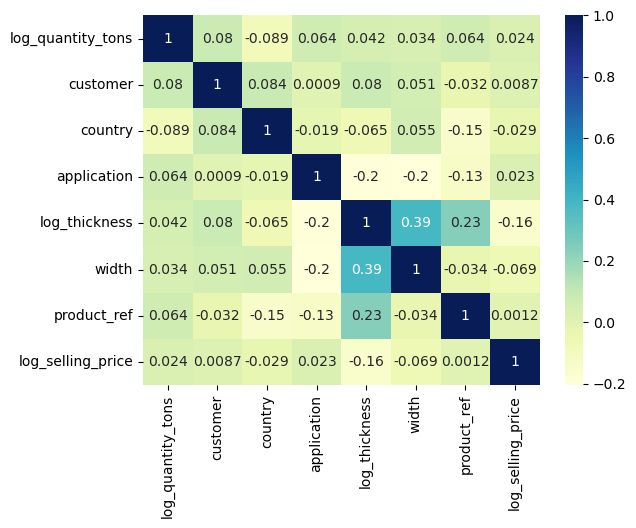

In [22]:
Correlation = data_outliers[['log_quantity_tons', 'customer', 'country', 'application', 'log_thickness', 'width', 'product_ref','log_selling_price']].corr()
sns.heatmap(Correlation, annot=True, cmap="YlGnBu")

In [23]:
# Filter out rows with -inf and NaN values in the target variable
data_outliers = data_outliers[~data_outliers['log_selling_price'].isin([-np.inf, np.inf])].dropna(subset=['log_selling_price'])



## Output is Numerical

### Defining Depedent and indepedent Variable

In [24]:
# The target(s) (dependent variable) is 'log_selling_price'
targets = data_outliers['log_selling_price']
# The inputs are everything BUT the dependent variable, so we can simply drop it with other data which is not required
inputs = data_outliers.drop(['selling_price', 'quantity tons', 'thickness', 'log_selling_price'],axis=1)


### Creating Dummies for catagorical Variable

In [25]:
# Use pd.get_dummies to one-hot encode the 'item type' and 'status' columns with 0 and 1
inputs_encoded = pd.get_dummies(inputs, columns=['item type', 'status'], drop_first=True, dtype=int)
inputs_encoded



,customer,country,application,width,product_ref,log_thickness,log_quantity_tons,item type_Others,item type_PL,item type_S,...,item type_W,item type_WI,status_Lost,status_Not lost for AM,status_Offerable,status_Offered,status_Revised,status_To be approved,status_Won,status_Wonderful
0,30156308.000000,28.000000,10.000000,1500.000000,1670798778,0.693147,3.991779,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,30202938.000000,25.000000,41.000000,1210.000000,1668701718,-0.223144,6.643822,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,30153963.000000,30.000000,28.000000,952.000000,628377,-0.967584,5.956169,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,30349574.000000,32.000000,59.000000,1317.000000,1668701718,0.832909,5.310301,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,30211560.000000,28.000000,10.000000,2000.000000,640665,1.386294,6.666354,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,30200854.000000,25.000000,41.000000,1240.000000,164141591,-0.040822,4.670802,0,0,0,...,1,0,0,0,0,0,0,0,1,0
181668,30200854.000000,25.000000,41.000000,1220.000000,164141591,-0.040822,4.629691,0,0,0,...,1,0,0,0,0,0,0,0,1,0
181669,30200854.000000,25.000000,41.000000,1500.000000,164141591,-0.051293,5.337954,0,0,0,...,1,0,0,0,0,0,0,0,1,0
181670,30200854.000000,25.000000,41.000000,1250.000000,164141591,-0.342490,1.443523,0,0,0,...,1,0,0,0,0,0,0,0,1,0


### Defining Scalar

In [51]:
# Create a scaler object
scaler1 = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler1.fit(inputs_encoded)

StandardScaler()

In [52]:
# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler1.transform(inputs_encoded)

### Defining Training and Testing

In [53]:
# Split the variables with an 80-20 split and some random state
# To have the same split, use random_state = integer of your desire
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=42)

### Creating a Model - Decision Tree Regressor 

Using Decision Tree Regressor because our model is Non- Linear and Our out put is Numerical

In [54]:
# Create a DecisionTreeRegressor
dtr = DecisionTreeRegressor()

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to your data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_

target_prediction = best_model.predict(x_test)


#### Evaluvation Metrics

In [56]:
mse = mean_squared_error(y_test, target_prediction)
r2 = r2_score(y_test, target_prediction)
print('Mean squared error:', mse)
print('R-squared:', r2)

Mean squared error: 0.03520524543817602
R-squared: 0.8920692329388679


### Checking the prediction

In [55]:
# Get the sample as a NumPy array
sample = inputs_encoded.iloc[4].to_numpy()

# Reshape the sample to a 2D array
sample = sample.reshape(1, -1)
sample_scaled = scaler1.transform(sample)
sample_Predict = best_model.predict(sample_scaled)
print('Predicted selling price:', np.exp(sample_Predict))

Predicted selling price: [638.34390965]


/Users/santhoshsivansundaramoorthy/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [47]:
sample.shape

(21,)

## Output is categorical

In [57]:
w_l_data = data_outliers[data_outliers['status'].isin(['Won', 'Lost'])]

In [58]:
w_l_data.shape

(150433, 13)

### Defining Depedent and indepedent Variable

In [59]:
target_category = w_l_data['status']
depedent_Variable = w_l_data.drop(['selling_price', 'quantity tons', 'thickness', 'status'],axis=1)

### Creating Dummies and scaling it

In [60]:
depedent_Variable_encoded = pd.get_dummies(depedent_Variable, columns=['item type'], drop_first=True, dtype=int)
depedent_Variable_encoded

,customer,country,application,width,product_ref,log_thickness,log_selling_price,log_quantity_tons,item type_Others,item type_PL,item type_S,item type_SLAWR,item type_W,item type_WI
0,30156308.000000,28.000000,10.000000,1500.000000,1670798778,0.693147,6.749931,3.991779,0,0,0,0,1,0
1,30202938.000000,25.000000,41.000000,1210.000000,1668701718,-0.223144,6.953684,6.643822,0,0,0,0,1,0
2,30153963.000000,30.000000,28.000000,952.000000,628377,-0.967584,6.468211,5.956169,0,0,0,0,0,1
3,30349574.000000,32.000000,59.000000,1317.000000,1668701718,0.832909,6.643790,5.310301,0,0,1,0,0,0
4,30211560.000000,28.000000,10.000000,2000.000000,640665,1.386294,6.357842,6.666354,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,30200854.000000,25.000000,41.000000,1240.000000,164141591,-0.040822,6.400257,4.670802,0,0,0,0,1,0
181668,30200854.000000,25.000000,41.000000,1220.000000,164141591,-0.040822,6.381816,4.629691,0,0,0,0,1,0
181669,30200854.000000,25.000000,41.000000,1500.000000,164141591,-0.051293,6.378426,5.337954,0,0,0,0,1,0
181670,30200854.000000,25.000000,41.000000,1250.000000,164141591,-0.342490,6.428105,1.443523,0,0,0,0,1,0


In [79]:
scaler2 = StandardScaler()  # Change this line to use 'scaler2'
scaler2.fit(depedent_Variable_encoded)  # Change this line as well
depedent_Variable_Scaled = scaler2.transform(depedent_Variable_encoded)  # Use 'scaler2' here


### Defining Training and Testing

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(depedent_Variable_Scaled, target_category, test_size=0.2, random_state=30)

### Creating a Model - Decision Tree Classifier 
Using Decision Tree Classifier because our model is Non- Linear and Our out put is Categorical

In [38]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
Predicted_target = dtc.predict(X_test)

#### Evaluvation Matrics

In [39]:
accuracy = accuracy_score(Y_test, Predicted_target)
accuracy

0.9143483896699571

In [40]:
confussion_matrix_data = confusion_matrix(Y_test,Predicted_target)
confussion_matrix_data

array([[ 5392,  1265],
       [ 1312, 22118]])

### Checking the prediction

In [80]:
# Get the sample as a NumPy array
sample_categorical = depedent_Variable_encoded.iloc[3].to_numpy()

# Reshape the sample to a 2D array
sample_categorical = sample_categorical.reshape(1, -1)
sample_scaled_cat = scaler2.transform(sample_categorical)
sample_Predict_cat = dtc.predict(sample_scaled_cat)
print('Status:', sample_Predict_cat)

Status: ['Won']


/Users/santhoshsivansundaramoorthy/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [84]:
depedent_Variable_encoded.columns

Index(['customer', 'country', 'application', 'width', 'product_ref',
       'log_thickness', 'log_selling_price', 'log_quantity_tons',
       'item type_Others', 'item type_PL', 'item type_S', 'item type_SLAWR',
       'item type_W', 'item type_WI'],
      dtype='object')

In [87]:
w_l_data['selling_price'].min()

0.1

## Saving the Model

In [81]:

# Saving the Model Reg
model_Reg_filename = 'model_reg.joblib'
joblib.dump(best_model, model_Reg_filename)

# Saving the Scaler
scaler_filename = 'scaler_reg.joblib'
joblib.dump(scaler1, scaler_filename)

# Saving the Model cat
model_cat_filename = 'model_Cat.joblib'
joblib.dump(dtc, model_cat_filename)

# Saving the Scaler_cat
scaler_filename = 'scaler_cat.joblib'
joblib.dump(scaler2, scaler_filename)


['scaler_cat.joblib']